In [4]:
!pip install -r requirements.txt #Run this if using Jupyter Notebook


[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial import Polynomial

In [10]:
#Checking file
doksli = 'bps-od_17073_umur_harapan_hidup__jk_kabupatenkota_v3_data.xlsx'
data_mentah = pd.read_excel(doksli)
data_mentah.head()

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,jenis_kelamin,umur_harapan_hidup,satuan,tahun
0,1,32,JAWA BARAT,3201,KABUPATEN BOGOR,LAKI-LAKI,68.85,TAHUN,2018
1,2,32,JAWA BARAT,3201,KABUPATEN BOGOR,PEREMPUAN,72.77,TAHUN,2018
2,3,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,LAKI-LAKI,68.46,TAHUN,2018
3,4,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,PEREMPUAN,72.40,TAHUN,2018
4,5,32,JAWA BARAT,3203,KABUPATEN CIANJUR,LAKI-LAKI,67.67,TAHUN,2018


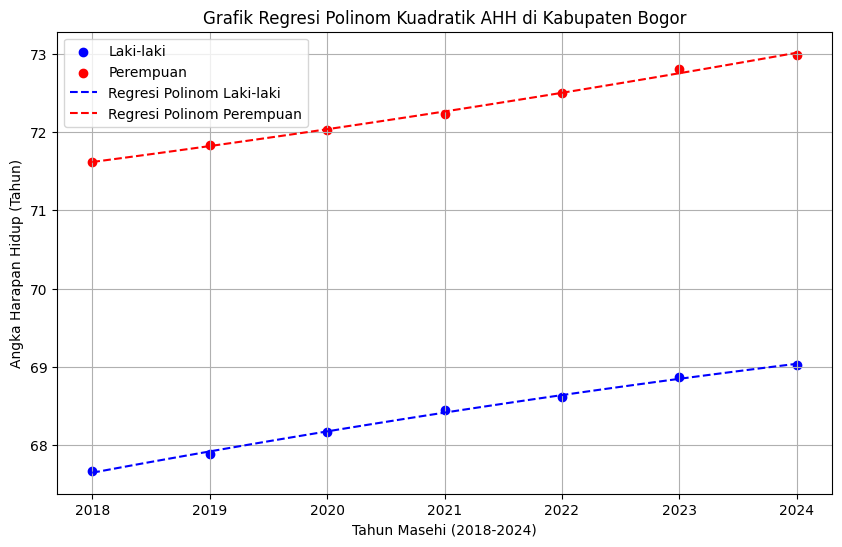

In [31]:
#Pilih Kabupaten/Kota (Misalnya Bogor(3201))
data = data_mentah[data_mentah['kode_kabupaten_kota'] == 3203]

#Ambil sampel berdasarkan jenis kelamin
data_laki = data[data['jenis_kelamin'] == 'LAKI-LAKI']
data_perempuan = data[data['jenis_kelamin'] == 'PEREMPUAN']

#Buat statement dari tahun dan umur harapan hidup
x_laki = data_laki['tahun']
y_laki = data_laki['umur_harapan_hidup']
x_perempuan = data_perempuan['tahun']
y_perempuan = data_perempuan['umur_harapan_hidup']

#Perhitungan polinom
derajat = 2  # Kuadratik polinom
p_laki = Polynomial.fit(x_laki, y_laki, derajat)
p_perempuan = Polynomial.fit(x_perempuan, y_perempuan, derajat)

#Koordinat plot
x_plot = np.linspace(min(data['tahun']), max(data['tahun']), 100)
y_plot_laki = p_laki(x_plot)
y_plot_perempuan = p_perempuan(x_plot)

plt.figure(figsize=(10, 6))
plt.scatter(x_laki, y_laki, color='blue', label='Laki-laki')
plt.scatter(x_perempuan, y_perempuan, color='red', label='Perempuan')
plt.plot(x_plot, y_plot_laki, color='blue', linestyle='--', label='Regresi Polinom Laki-laki')
plt.plot(x_plot, y_plot_perempuan, color='red', linestyle='--', label='Regresi Polinom Perempuan')

plt.title('Grafik Regresi Polinom Kuadratik AHH di Kabupaten Bogor')
plt.xlabel('Tahun Masehi (2018-2024)')
plt.ylabel('Angka Harapan Hidup (Tahun)')
plt.legend()
plt.grid()
plt.show()




In [32]:
# Buat fungsi untuk perhitungan kuadratik (r-squared)
def polyfit(x, y, derajat):
    coeffs = np.polyfit(x, y, derajat)
    p = np.poly1d(coeffs)
    # r-squared
    yhat = p(x)
    ybar = np.sum(y)/len(y)
    ssreg = np.sum((yhat-ybar)**2)
    sstot = np.sum((y - ybar)**2)
    results = ssreg / sstot
    return results

In [33]:
# Tentukan r-squared dari model polinom di atas dengan nilai derajat = 2
print("Nilai r-squared peremuan = ", polyfit(x_laki, y_laki, derajat))

Nilai r-squared peremuan =  0.9976618014797098


In [34]:
# # Tentukan r-squared dari model polinom di atas dengan nilai derajat = 2
print("Nilai r-squared peremuan = ", polyfit(x_perempuan, y_perempuan, derajat))

Nilai r-squared peremuan =  0.9962303225822841
